In [140]:
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def read_fsi():
    csvFile = open("modified_fsi-2017.csv", "r")
    reader = csv.reader(csvFile)
    attr_dic = {}
    score_dic = {}
    attributes = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            attributes = item[4:]
            continue
        attr_dic[item[0]] = [float(i) for i in item[4:]]
        score_dic[item[0]] = float(item[3])
    csvFile.close()
    return attr_dic, score_dic, attributes

In [148]:
def input_fsi():
    attr_dic, score_dic, attributes = read_fsi()
    for (idx, item) in enumerate(attr_dic):
        if idx == 0:
            attr = np.array(attr_dic[item])
        new_attr = np.array(attr_dic[item])
        attr = np.vstack((attr, new_attr))
    for (idx, item) in enumerate(score_dic):
        if idx == 0:
            score = np.array(score_dic[item])
        new_score = np.array(score_dic[item])
        score = np.vstack((score, new_score))
    return attr, score

In [153]:
def read_epi():
    csvFile = open("modified_EPI.csv", "r")
    reader = csv.reader(csvFile)
    attr_dic = {}
    score_dic = {}
    attributes = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            attributes = item[3:10]
            continue
        attr_dic[item[2]] = [float(i) for i in item[3:10]]
        score_dic[item[2]] = float(item[10])
    csvFile.close()
    return attr_dic, score_dic, attributes

In [154]:
def input_epi():
    attr_dic, score_dic, attributes = read_epi()
    for (idx, item) in enumerate(attr_dic):
        if idx == 0:
            attr = np.array(attr_dic[item])
        new_attr = np.array(attr_dic[item])
        attr = np.vstack((attr, new_attr))
    for (idx, item) in enumerate(score_dic):
        if idx == 0:
            score = np.array(score_dic[item])
        new_score = np.array(score_dic[item])
        score = np.vstack((score, new_score))
    return attr, score

In [116]:
attr, score = input_epi()
print(attr)
print(score)

{'Afghanistan': [34.656032, 2.689163473, 53.08340532, 60.28705023, 652860.0, 1739.583177, 46.8, 37.74, 168.0], 'Albania': [2.876101, -0.159880412, 104.9671898, 32.66991645, 27400.0, 11359.09916, 68.9, 65.46, 40.0], 'Algeria': [40.606052, 1.825463432, 17.04889491, 565.284, 2381741.0, 13921.17608, 68.8, 57.18, 88.0], 'Angola': [28.813463, 3.367572131, 23.11178551, 172.438, 1246700.0, 5984.632947, 50.2, 37.44, 170.0], 'Argentina': [43.84743, 0.984741906, 16.0220668, 810.714, 2736690.0, 18489.43028, 72.5, 59.3, 74.0], 'Armenia': [2.924816, 0.269302288, 102.7332631, 23.95494292, 28470.0, 8190.239289, 71.7, 62.07, 63.0], 'Australia': [24.127159, 1.410063834, 3.140616612, 1071.58, 7682300.0, 44413.84914, 75.9, 74.12, 21.0], 'Austria': [8.747358, 1.314006681, 105.9990306, 388.015, 82523.0, 44357.965, 81.4, 78.97, 8.0], 'Azerbaijan': [9.762274, 1.163574223, 118.0972624, 156.138, 82663.0, 15994.01943, 70.8, 62.33, 59.0], 'Bahrain': [1.425171, 3.812796793, 1848.470817, 64.33731963, 771.0, 45143.5

In [386]:
def share_country():
    '''
    Find shared countries of FSI and EPI data.
    Return:
        FSI_data -- FSI data sorted according to countries.
        EPI_data -- EPI data sorted according to countries.
    Note that these two dictionaries have the same number of countries.
    And they also have the aligned attributes based on countries order.
    '''
    fsi_attrdic, fsi_scoredic, fsi_attributes = read_fsi()
    epi_attrdic, epi_scoredic, epi_attributes = read_epi()
    share_key = []
    cnt = 0
    # First, delete all keys and values in fsi but not in epi
    for (idx, item) in enumerate(fsi_attrdic):
        epi_key = list(epi_attrdic.keys())
        if item in epi_key:
            if cnt == 0:
                fsi_attr = np.array(fsi_attrdic[item]).reshape(1,-1)
                fsi_score = np.array(fsi_scoredic[item])
                share_key.append(item)
            else:
                share_key.append(item)
                fsi_attr = np.vstack((fsi_attr, fsi_attrdic[item]))
                fsi_score = np.vstack((fsi_score, fsi_scoredic[item]))
            cnt += 1
    cnt = 0
    # Second, delete all keys and values in epi but not in fsi
    for (idx, item) in enumerate(epi_attrdic):
        fsi_key = list(fsi_attrdic.keys())
        if item in fsi_key:
            if cnt == 0:
                epi_attr = np.array(epi_attrdic[item]).reshape(1,-1)
                epi_score = np.array(epi_scoredic[item])
            else:
                epi_attr = np.vstack((epi_attr, epi_attrdic[item]))
                epi_score = np.vstack((epi_score, epi_scoredic[item]))
            cnt += 1
    df = pd.DataFrame(data = {'country': share_key,
                              'FSI': fsi_score.ravel(),
                              'EPI': epi_score.ravel(),
                              fsi_attributes[0]: fsi_attr[:,0].ravel(),
                              fsi_attributes[1]: fsi_attr[:,1].ravel(), 
                              fsi_attributes[2]: fsi_attr[:,2].ravel(),
                              fsi_attributes[3]: fsi_attr[:,3].ravel(), 
                              fsi_attributes[4]: fsi_attr[:,4].ravel(),
                              fsi_attributes[5]: fsi_attr[:,5].ravel(), 
                              fsi_attributes[6]: fsi_attr[:,6].ravel(),
                              fsi_attributes[7]: fsi_attr[:,7].ravel(), 
                              fsi_attributes[8]: fsi_attr[:,8].ravel(),
                              fsi_attributes[9]: fsi_attr[:,9].ravel(),
                              fsi_attributes[10]: fsi_attr[:,10].ravel(), 
                              fsi_attributes[11]: fsi_attr[:,11].ravel(),
                              epi_attributes[0]: epi_attr[:,0].ravel(),
                              epi_attributes[1]: epi_attr[:,1].ravel(), 
                              epi_attributes[2]: epi_attr[:,2].ravel(),
                              epi_attributes[3]: epi_attr[:,3].ravel(), 
                              epi_attributes[4]: epi_attr[:,4].ravel(),
                              epi_attributes[5]: epi_attr[:,5].ravel(), 
                              epi_attributes[6]: epi_attr[:,6].ravel()})
    df.to_csv('share_data.csv')
    return share_key, fsi_attr, epi_attr

In [385]:
country, fsi_attr, epi_attr = share_country()

In [190]:
def input_result():
    csvFile = open("share_data.csv", "r")
    reader = csv.reader(csvFile)
    fsi_dic = {}
    epi_dic = {}
    fsi = []
    epi = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            continue
        fsi_dic[item[1]] = float(item[2])
        epi_dic[item[1]] = float(item[3])
        fsi.append(float(item[2]))
        epi.append(float(item[3]))
    csvFile.close()
    return fsi, epi

In [192]:
fsi, epi = input_result()

In [193]:
plt.scatter(fsi, epi)

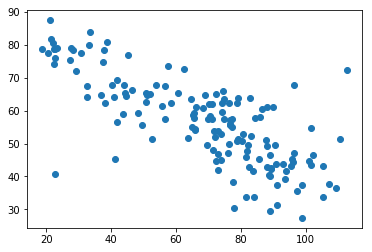

In [194]:
plt.show()

In [195]:
from sklearn.cluster import KMeans

In [206]:
def cluster(data, n_clusters):
    '''
    Cluster data into n_clusters categories.
    Input:
        data -- The input data to be clustered.
        n_clusters -- The number of categories to be clustered.
    Return:
        label_pred -- The category array corresponding to every data.
    '''
    estimator = KMeans(n_clusters = n_clusters)
    estimator.fit(data)
    label_pred = estimator.labels_
    print(label_pred)
    return label_pred

In [210]:
FSI_data = np.array([fsi]).reshape([-1,1])
EPI_data = np.array([epi]).reshape([-1,1])
FSI_label = cluster(FSI_data, 2)
EPI_label = cluster(EPI_data, 2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [211]:
plt.scatter(FSI_data[FSI_label == 1], EPI_data[FSI_label == 1], c = 'r')
plt.scatter(FSI_data[FSI_label == 0], EPI_data[FSI_label == 0], c = 'b')

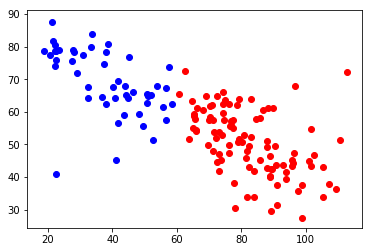

In [212]:
plt.show()

In [213]:
plt.scatter(FSI_data[EPI_label == 1], EPI_data[EPI_label == 1], c = 'r')
plt.scatter(FSI_data[EPI_label == 0], EPI_data[EPI_label == 0], c = 'b')

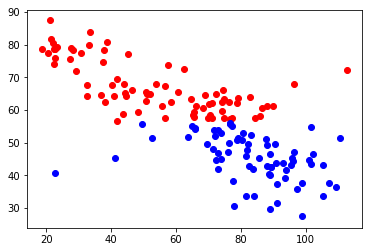

In [214]:
plt.show()

In [215]:
def find_bound(data, label, mode = 1):
    '''
    Find the boundary of clusters.
    Input:
        data -- The input data to be clustered.
        label -- The label corresponding to the input data.
        mode -- mode = 1 means we need to find the minimum bound of data with label = 1 while maximum bound for label = 0.
                mode = 0 means we need to find the maximum bound of data with label = 0 while maximum bound for label = 1.
    Return:
        bound -- The boundary of 1-dim cluster.
    '''
    if mode:
        label1_min = min(data[label == 1])
        label0_max = max(data[label == 0])
        bound = (label1_min+label0_max)/2
    else:
        label1_max = max(data[label == 1])
        label0_min = min(data[label == 0])
        bound = (label1_max+label0_min)/2
    return bound

In [226]:
FSI_bound = find_bound(FSI_data, FSI_label)
EPI_bound = find_bound(EPI_data, EPI_label)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 1)], EPI_data[(FSI_label == 1) & (EPI_label == 1)], c = 'r')
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 0)], EPI_data[(FSI_label == 1) & (EPI_label == 0)], c = 'b')
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 1)], EPI_data[(FSI_label == 0) & (EPI_label == 1)], c = 'm')
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 0)], EPI_data[(FSI_label == 0) & (EPI_label == 0)], c = 'y')
FSI_bound_y = np.linspace(min(EPI_data), max(EPI_data), 1000)
FSI_bound_x = np.full(FSI_bound_y.shape, FSI_bound)
EPI_bound_x = np.linspace(min(FSI_data), max(FSI_data), 1000)
EPI_bound_y = np.full(EPI_bound_x.shape, EPI_bound)
plt.plot(FSI_bound_x, FSI_bound_y, c = 'k')
plt.plot(EPI_bound_x, EPI_bound_y, c = 'k')
plt.xlabel('FSI')
plt.ylabel('EPI')

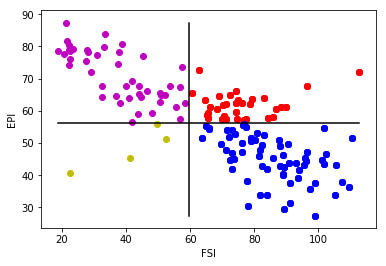

In [227]:
plt.show()

In [256]:
from mlxtend.plotting import plot_decision_regions

In [405]:
def logistic_util(X, Y, test_size, random_state):
    '''
    Implement logistic regression with sklearn.
    Input:
        X -- The independent variables set.
        Y -- The dependent variable/target set.
        test_size -- Test size of the whole set.
        random_state -- Param for train_test_split.
    Output:
        lr -- Logistic Regression Result.
    '''
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)
    Y_train, Y_test = Y_train.ravel(), Y_test.ravel()
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    # Normalize the data
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = np.array(list(sc.transform(X_train)))
    X_test_std = np.array(list(sc.transform(X_test)))
    # Combine the train and test data
    X_combined_std = np.vstack((X_train_std, X_test_std))
    Y_combined = np.hstack((Y_train, Y_test))
    # Implement logistic regression
    lr = LogisticRegression(C = 1.0, random_state = 0)
    lr.fit(X_train_std, Y_train)
    print(lr.predict_proba(X_test_std[2,:].reshape(1,-1))[0,0], Y_test[2])
    scores = cross_val_score(lr, X_combined_std, Y_combined, cv = 5, scoring = 'accuracy')
    print(scores)
    return lr, X_combined_std, Y_combined
    '''
    plot_decision_regions(X_combined_std, Y_combined, clf = lr, res = 0.02)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc = 'upper left')
    plt.show()
    '''

In [407]:
from sklearn.cross_validation import cross_val_score

In [408]:
lr1, fsi_attr_std, _ = logistic_util(fsi_attr, EPI_label, 0.2, 0)
probE0_H = lr1.predict_proba(fsi_attr_std)[:,0]
probE1_H = np.ones(probE0_H.shape)-probE0_H

(118, 12) (30, 12) (118,) (30,)
0.0391059090268 1
[ 0.86666667  0.76666667  0.8         0.82758621  0.75862069]


In [409]:
lr2, fsi_attr_std, _ = logistic_util(fsi_attr, (EPI_label == 0) & (FSI_label == 1), 0.2, 0)
prob_other = lr2.predict_proba(fsi_attr_std)[:,0]
probE0F1_H = np.ones(prob_other.shape)-prob_other

(118, 12) (30, 12) (118,) (30,)
0.981749125054 False
[ 0.83870968  0.76666667  0.86206897  0.86206897  0.79310345]


In [410]:
lr3, fsi_attr_std, _ = logistic_util(fsi_attr, (EPI_label == 1) & (FSI_label == 1), 0.2, 0)
prob_other = lr3.predict_proba(fsi_attr_std)[:,0]
probE1F1_H = np.ones(prob_other.shape)-prob_other

(118, 12) (30, 12) (118,) (30,)
0.899928537318 False
[ 0.73333333  0.8         0.76666667  0.72413793  0.79310345]


In [398]:
probF1_E0H = probE0F1_H / probE0_H
probF1_E1H = probE1F1_H / probE1_H
print(probF1_E0H.shape, probF1_E1H.shape)

(148,) (148,)


In [403]:
fragile_value = []
for i in range(len(fsi_attr_std)):
    if EPI_label[i] == 1:
        fragile_value.append(probF1_E1H[i])
    else:
        fragile_value.append(probF1_E0H[i])
print(fragile_value[129], EPI_label[129], probF1_E1H[129])

2.88491119342 1 2.88491119342


In [373]:
fragile_value = np.array(fragile_value).reshape(-1,1)
sc = StandardScaler()
sc.fit(fragile_value)
fragile_std = (255*(np.array(list(sc.transform(fragile_value)))+1)/2).astype(np.uint8)
fragile_std = fragile_std.reshape(len(fragile_std))
print(fragile_std)

[125  77 104 122 141 161 107  78 140 125  96 118  76  74  74 121 125 122
  87 126 109  73 128 119 101 103 118  87 127 133 145 118  76  90  74 179
  76  93 118 121 159  77  82  80  71 126 113  88 118  83  78  87 122 120
 123  81 115 119 129 154  82 131 122  73 123  78  79  73  65  80 124 124
 126 102 219  76 121  87  90  73  75  92 121  98 123  76  86  98 221 122
 153 225   9 124  81  92  77  91 103  81  94 123 195 122 120 124 123 166
 100  94  74 101  78 115  85 100 120  79 125  72  76 126 141  74  98 126
 111 125 237 223 106 122 124 124 106  88  73  85  97 123 123  82 154  94
 124  94 134 125]


In [378]:
import seaborn as sn
pal = sn.color_palette("Blues", 255)

In [380]:
color = []
for i in range(len(fragile_std)):
    color.append(pal[fragile_std[i]])

In [381]:
FSI_bound = find_bound(FSI_data, FSI_label)
EPI_bound = find_bound(EPI_data, EPI_label)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 1)], EPI_data[(FSI_label == 1) & (EPI_label == 1)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 0)], EPI_data[(FSI_label == 1) & (EPI_label == 0)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 1)], EPI_data[(FSI_label == 0) & (EPI_label == 1)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 0)], EPI_data[(FSI_label == 0) & (EPI_label == 0)], c = color, cmap = plt.cm.Blues)
FSI_bound_y = np.linspace(min(EPI_data), max(EPI_data), 1000)
FSI_bound_x = np.full(FSI_bound_y.shape, FSI_bound)
EPI_bound_x = np.linspace(min(FSI_data), max(FSI_data), 1000)
EPI_bound_y = np.full(EPI_bound_x.shape, EPI_bound)
plt.plot(FSI_bound_x, FSI_bound_y, c = 'k')
plt.plot(EPI_bound_x, EPI_bound_y, c = 'k')
plt.xlabel('FSI')
plt.ylabel('EPI')

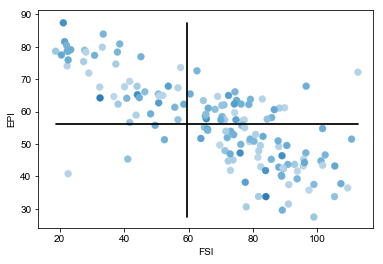

In [382]:
plt.show()

In [390]:
country = np.array(country)
print(country.shape)
print(country[fragile_value.reshape(len(country)) > 1])

(148,)
['Afghanistan' 'Argentina' 'Armenia' 'Azerbaijan' 'Bahrain' 'Bhutan'
 'Botswana' 'Burkina Faso' 'Chad' 'Chile' 'China' 'Cuba'
 'Dominican Republic' 'Ethiopia' 'Honduras' 'Hungary' 'India' 'Japan'
 'Kazakhstan' 'Kenya' 'Kuwait' 'Latvia' 'Lithuania' 'Mali' 'Mexico'
 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique' 'Nigeria' 'Norway' 'Panama'
 'Peru' 'Sierra Leone' 'South Africa' 'South Korea' 'Sudan' 'Swaziland'
 'Sweden' 'Switzerland' 'Thailand' 'Timor-Leste' 'Uganda' 'United Kingdom'
 'Uzbekistan' 'Zambia' 'Zimbabwe']


In [404]:
print(probE1_H[129])
print(probE1F1_H[129])
print(probF1_E1H[129], fragile_value[129])

0.0553071690509
0.159556271071
2.88491119342 2.88491119342


In [396]:
print(EPI_label[129])

1
